Step-1: Upload image: The first step allows you to upload an image from your local machine to the Colab environment

In [66]:
from google.colab import files

# This will open a file picker to upload image
uploaded = files.upload()

Saving cat.jpg to cat (2).jpg


Step-2: Import libraries: This step imports all the necessary libraries for image processing, deep learning, and plotting

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

numpy is used for numericals; matplotlib is used for visualize images; os is used for manage files and directory operatons like path handling; tensorflow.keras.preprocessing is for provide utilities to load images from disk; VGG16 is a pre-trained neural network architecture; preprocess _input is usedprepares the image data to match input format and range that VGG16 expects; decode_predictions is used to translates the output  

Step-3: Load pre-trained model: A pre-trained VGG16 model, which has already been trained on the large ImageNet dataset, is loaded.

In [63]:
# Load the VGG16 model pre-trained on ImageNet
model = VGG16(weights='imagenet')

weights=imagenet tells Keras to load the model with pre-trained weights

Step-4: Classify image: The preprocessed image is fed into the VGG16 model to predict what the image contains.

✅ Image found. Classifying...


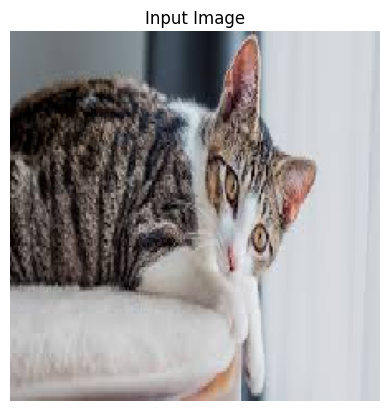

In [67]:
# Change this to the uploaded filename
img_path = 'cat.jpg'  # Example: change to your uploaded filename

# Check if file exists
if os.path.exists(img_path):
    print("✅ Image found. Classifying...")

    # Load and resize image to 224x224 for VGG16
    img = image.load_img(img_path, target_size=(224, 224))

    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Convert to array and preprocess
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
else:
    print("❌ Image file not found.")

this block of code is fully focused on preparing and displaying an image

Step-5: Display results: The top predictions from the model are displayed, along with their confidence scores. The most likely prediction is then highlighted

In [68]:
# Predict the class
preds = model.predict(x)

# Decode predictions (top 3 results)
decoded = decode_predictions(preds, top=3)[0]

# Show results
print("\nTop Predictions:")
for i, (imagenet_id, label, prob) in enumerate(decoded):
    print(f"{i+1}. {label}: {prob*100:.2f}%")

# Pick the most confident one
animal_name = decoded[0][1].replace("_", " ")  # Make it more readable

# Show result
print(f"\n✅ It's a {animal_name}!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step

Top Predictions:
1. tabby: 33.86%
2. Egyptian_cat: 22.84%
3. tiger_cat: 22.47%

✅ It's a tabby!


this block of code brings everything together to generate predictions using VGG16 and display the results